# To do:

1. add in logistic regression or NN if we have time (i think there are some examples on github we can just rip)
2. add in exploratory data analysis (ricky)
3. find out if there's a nice way to display a .dot (the cancerTree.dot file generated) graph inline in the console (pygraphviz won't install on my environment and the graphviz.source stuff isn't working, haven't had the time to figure it out)
4. add in some comments and documentation

In [23]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier     #KNN
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.tree import DecisionTreeClassifier        #Decision Tree
from sklearn.ensemble import RandomForestClassifier    #Random Forest
from sklearn.neural_network import MLPClassifier       #Neural Network
from sklearn.svm import SVC                            #SVM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
import matplotlib.pylab as plt
import numpy as np
import graphviz
from graphviz import Source

ModuleNotFoundError: No module named 'pygraphviz'

In [3]:
%matplotlib inline
#%%
#load the breast cancer data
cancer = load_breast_cancer()
print(cancer.keys())
print(cancer.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were c

In [7]:
#%%
#print feature names to visualize
print(cancer.feature_names)
#%%
#print target names to visualize
print(cancer.target_names)
#%%
#look at dimensions of dataset
type(cancer.data)
cancer.data.shape

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


(569, 30)

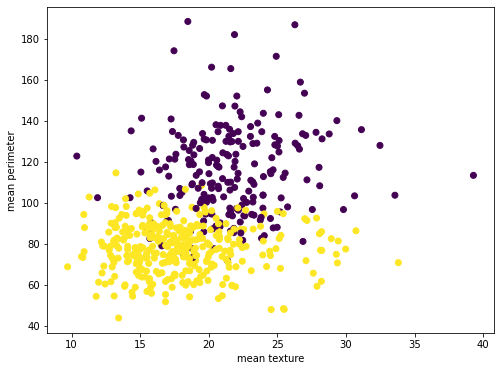

In [8]:
#%%
#plotting 2D of texture and perimeter
fig = plt.figure(figsize=(8,6))
plt.scatter(cancer.data[:,1], cancer.data[:,2], c=cancer.target)
plt.xlabel(str(cancer.feature_names[1]))
plt.ylabel(str(cancer.feature_names[2]))
plt.show()
#%%

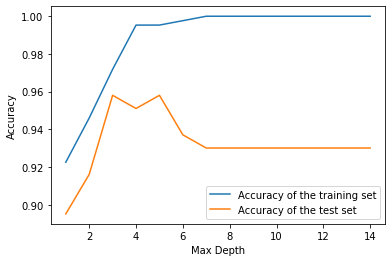

In [16]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

training_accuracy = []
test_accuracy = []

max_dep = range(1,15)

for md in max_dep:
    tree = DecisionTreeClassifier(max_depth=md,random_state=0)
    tree.fit(X_train,y_train)
    training_accuracy.append(tree.score(X_train, y_train))
    test_accuracy.append(tree.score(X_test, y_test))
 
plt.plot(max_dep,training_accuracy, label='Accuracy of the training set')
plt.plot(max_dep,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()


In [24]:
# By having larger max_depth (>5), we overfit the model into training data, so the accuracy for training set become 
# but the accuracy for test set decrease

# other parameters than can work with:
# - min_samples_leaf, max_sample_leaf
# - max_leaf_node

# by looking at plot, best result accurs when max_depth is 3

#%%
#exporting deciison tree

export_graphviz(tree, out_file="cancerTree.dot", class_names=['malignant','benign'], feature_names=cancer.feature_names, impurity=False, filled=True)
#%%

print('Feature importances: {}'.format(tree.feature_importances_))


Feature importances: [0.         0.         0.         0.         0.         0.
 0.         0.72468105 0.         0.         0.01277192 0.
 0.         0.         0.00826156 0.         0.         0.01702539
 0.         0.         0.05899273 0.12550655 0.00838371 0.03452044
 0.00985664 0.         0.         0.         0.         0.        ]


Feature importances: [0.         0.         0.         0.         0.         0.
 0.         0.72468105 0.         0.         0.01277192 0.
 0.         0.         0.00826156 0.         0.         0.01702539
 0.         0.         0.05899273 0.12550655 0.00838371 0.03452044
 0.00985664 0.         0.         0.         0.         0.        ]


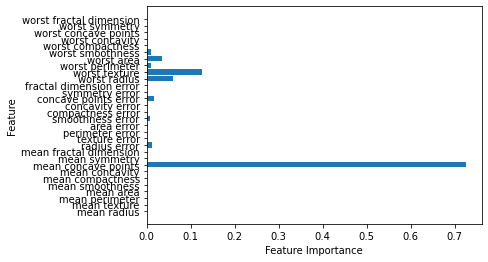

In [18]:
print('Feature importances: {}'.format(tree.feature_importances_))
type(tree.feature_importances_)
#%%

#Feature Importance
n_feature = cancer.data.shape[1]
plt.barh(range(n_feature), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_feature), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()